In [401]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
# 100 a_0 / a_dd = 5 / 3.5
a_default = 5/3.5
def V(rho, z, alpha, m, a = a_default):
    m = m + 1/4
    return (m**2-1/4+1/4)/(2*rho**2)+3*(1-3*(z**2/(z**2+rho**2)))/(z**2+rho**2)**(3/2)+1/2*(alpha)**4*z**2-a**4/(z**2+rho**2)**3

def dVdz(rho, z, alpha, m, a = a_default):
    return z*((alpha)**4+9*(2*z**2-3*rho**2)/((z**2+rho**2)**(7/2)))+(a**4)*6*z/(z**2+rho**2)**4

def dVdrho(rho, z, alpha, m, a = a_default):
    return (1/4-1/4-m**2)/rho**3-9*rho*(-4*z**2+rho**2)/(z**2+rho**2)**(7/2)+(a**4)*6*rho/(z**2+rho**2)**4

def derivativeV(rho, z, alpha, m, a = a_default):
    return [dVdz(rho, z, alpha, m), dVdrho(rho, z, alpha, m)]

In [402]:
derivativeV(1,1,1,1)
#V(1, 1, 1, 100)

[1.7663541006528476, 2.9483346159923114]

In [403]:
‘hybr’ (see here)
‘lm’ (see here)
‘broyden1’ (see here)
‘broyden2’ (see here)
‘anderson’ (see here)
‘linearmixing’ (see here)
‘diagbroyden’ (see here)
‘excitingmixing’ (see here)
‘krylov’ (see here)
‘df-sane’ (see here)

SyntaxError: invalid character '‘' (U+2018) (<ipython-input-403-a4a1537259de>, line 1)

In [404]:
def SaddlePosition(alpha, m, a = a_default):
    def currentDerivativeV(r):
        rho, z = r
        return derivativeV(rho, z, alpha, m, a_default)
    sol = root(currentDerivativeV, [1, 1], method='lm')
    return sol.x

In [405]:
barrierHeight(1, 1)

<ipython-input-401-4a8af782a5e6>:11: RuntimeWarning: overflow encountered in double_scalars
  return z*((alpha)**4+9*(2*z**2-3*rho**2)/((z**2+rho**2)**(7/2)))+(a**4)*6*z/(z**2+rho**2)**4
<ipython-input-401-4a8af782a5e6>:14: RuntimeWarning: overflow encountered in double_scalars
  return (1/4-1/4-m**2)/rho**3-9*rho*(-4*z**2+rho**2)/(z**2+rho**2)**(7/2)+(a**4)*6*rho/(z**2+rho**2)**4


array([9.98730842e+50, 0.00000000e+00])

In [406]:
NbIteration = 100
AlphaList = 0.0 + np.array(list(range(NbIteration)))/50
SaddlePosition_M0 = [] 
SaddlePosition_M1 = []
SaddlePosition_M2 = []
SaddleHeight_M0 = [] 
SaddleHeight_M1 = [] 
SaddleHeight_M2 = [] 

for alpha in AlphaList:
    result_M0 = SaddlePosition(alpha, 0)
    result_M1 = SaddlePosition(alpha, 1)
    result_M2 = SaddlePosition(alpha, 2)
    SaddlePosition_M0 += [result_M0]
    SaddlePosition_M1 += [result_M1]
    SaddlePosition_M2 += [result_M2]
    SaddleHeight_M0 += [V(result_M0[0],result_M0[1], alpha, 0)]
    SaddleHeight_M1 += [V(result_M1[0],result_M1[1], alpha, 1)]
    SaddleHeight_M2 += [V(result_M2[0],result_M2[1], alpha, 2)]
SaddlePosition_M0 = np.array(SaddlePosition_M0)
SaddlePosition_M1 = np.array(SaddlePosition_M1)
SaddlePosition_M2 = np.array(SaddlePosition_M2)
SaddleHeight_M0 = np.array(SaddleHeight_M0)
SaddleHeight_M1 = np.array(SaddleHeight_M1)
SaddleHeight_M2 = np.array(SaddleHeight_M2)


SaddlePosition_M0_noC6 = [] 
SaddlePosition_M1_noC6 = []
SaddlePosition_M2_noC6 = []
SaddleHeight_M0_noC6 = [] 
SaddleHeight_M1_noC6 = [] 
SaddleHeight_M2_noC6 = [] 

for alpha in AlphaList:
    result_M0_noC6 = SaddlePosition(alpha, 0, 0)
    result_M1_noC6 = SaddlePosition(alpha, 1, 0)
    result_M2_noC6 = SaddlePosition(alpha, 2, 0)
    SaddlePosition_M0_noC6 += [result_M0_noC6]
    SaddlePosition_M1_noC6 += [result_M1_noC6]
    SaddlePosition_M2_noC6 += [result_M2_noC6]
    SaddleHeight_M0_noC6 += [V(result_M0_noC6[0],result_M0_noC6[1], alpha, 0, 0)]
    SaddleHeight_M1_noC6 += [V(result_M1_noC6[0],result_M1_noC6[1], alpha, 1, 0)]
    SaddleHeight_M2_noC6 += [V(result_M2_noC6[0],result_M2_noC6[1], alpha, 2, 0)]
SaddlePosition_M0_noC6 = np.array(SaddlePosition_M0_noC6)
SaddlePosition_M1_noC6 = np.array(SaddlePosition_M1_noC6)
SaddlePosition_M2_noC6 = np.array(SaddlePosition_M2_noC6)
SaddleHeight_M0_noC6 = np.array(SaddleHeight_M0_noC6)
SaddleHeight_M1_noC6 = np.array(SaddleHeight_M1_noC6)
SaddleHeight_M2_noC6 = np.array(SaddleHeight_M2_noC6)

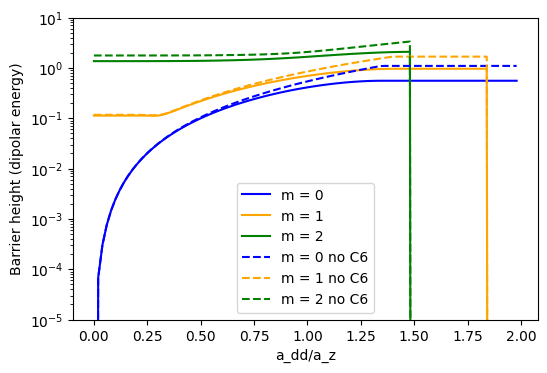

In [416]:
plt.figure(dpi = 100)
plt.semilogy(AlphaList, SaddleHeight_M0, label = "m = 0", color = 'blue')
plt.semilogy(AlphaList, SaddleHeight_M1, label = "m = 1", color = 'orange')
plt.semilogy(AlphaList, SaddleHeight_M2, label = "m = 2", color = 'green')
plt.semilogy(AlphaList, SaddleHeight_M0_noC6, '--', label = "m = 0 no C6", color = 'blue')
plt.semilogy(AlphaList, SaddleHeight_M1_noC6, '--', label = "m = 1 no C6", color = 'orange')
plt.semilogy(AlphaList, SaddleHeight_M2_noC6, '--', label = "m = 2 no C6", color = 'green')
plt.legend()
plt.xlabel("a_dd/a_z")
plt.ylabel("Barrier height (dipolar energy)")
#plt.xlim(0,0.5)
plt.ylim(10**(-5),10)
plt.show()

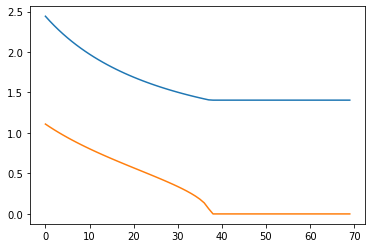

In [408]:
plt.figure()
plt.plot(SaddlePosition_M0[30:])
plt.show()

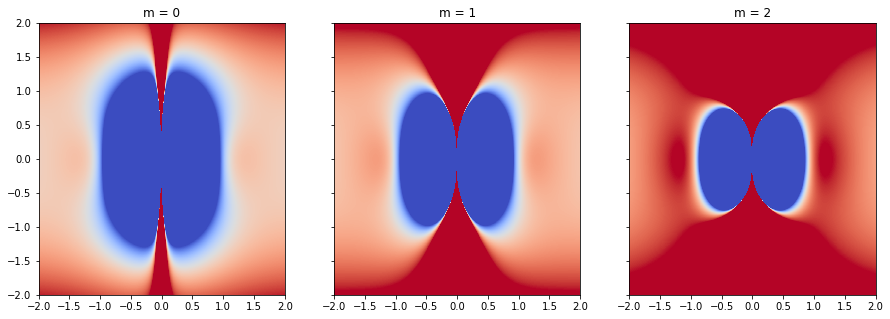

In [417]:
rho_lim = 2
z_lim = 2
rho, z = np.meshgrid(np.linspace(-rho_lim, rho_lim, 1000), np.linspace(-z_lim, z_lim, 1000))
potential_0 = V(rho, z, 1, 0)
potential_1 = V(rho, z, 1, 1)
potential_2 = V(rho, z, 1, 2)
potential_min, potential_max = -np.abs(potential_0).max(), np.abs(potential_0).max()

fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1, 3, hspace=1)
ax1, ax2, ax3 = gs.subplots(sharex=True, sharey=True)
c1 = ax1.pcolormesh(rho, z, potential_0, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
c2 = ax2.pcolormesh(rho, z, potential_1, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
c2 = ax3.pcolormesh(rho, z, potential_2, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
ax1.set_title('m = 0')
ax2.set_title('m = 1')
ax3.set_title('m = 2')
ax1.axis([-rho_lim, rho_lim, -z_lim, z_lim])
#fig.colorbar(c1)
#cbaxes = fig.add_axes([1, 1, 1, 1]) 
#cb = plt.colorbar(ax, cax = cbaxes)

plt.show()

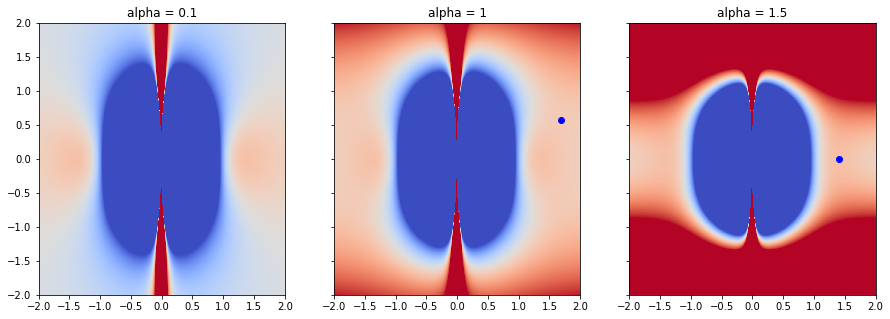

In [412]:
rho_lim = 2
z_lim = 2
rho, z = np.meshgrid(np.linspace(-rho_lim, rho_lim, 1000), np.linspace(-z_lim, z_lim, 1000))
potential_0 = V(rho, z, 0.1, 0)
saddle_0 = SaddlePosition(0.1, 0)
potential_1 = V(rho, z, 1, 0)
saddle_1 = SaddlePosition(1, 0)
potential_2 = V(rho, z, 1.5, 0)
saddle_2 = SaddlePosition(1.5, 0)
potential_min, potential_max = -np.abs(potential_0).max(), np.abs(potential_0).max()

fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1, 3, hspace=1)
ax1, ax2, ax3 = gs.subplots(sharex=True, sharey=True)
c1 = ax1.pcolormesh(rho, z, potential_0, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
ax1.plot(saddle_0[0], saddle_0[1], 'bo')
c2 = ax2.pcolormesh(rho, z, potential_1, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
ax2.plot(saddle_1[0], saddle_1[1], 'bo')
c2 = ax3.pcolormesh(rho, z, potential_2, cmap='coolwarm', shading='nearest', vmin=-2, vmax=2)
ax3.plot(saddle_2[0], saddle_2[1], 'bo')
ax1.set_title('alpha = 0.1')
ax2.set_title('alpha = 1')
ax3.set_title('alpha = 1.5')
ax1.axis([-rho_lim, rho_lim, -z_lim, z_lim])
#fig.colorbar(c1)

plt.show()

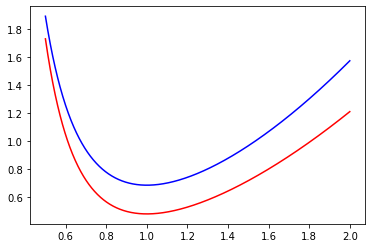

In [343]:
r = np.linspace(0.5,2,1000)
vec0 = SaddlePosition(1, 0)
vec1 = SaddlePosition(1, 1)

plt.figure()
plt.plot(r, V(r*vec0[0], r*vec0[1], 1, 0), 'r-')
plt.plot(r, V(r*vec1[0], r*vec1[1], 1, 1), 'b-')
plt.show()

Now add C6 in the game

In [ ]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

def V(rho, z, alpha, m):
    return (m**2-1/4)/(2*rho**2)+3*(1-3*(z/rho)**2)/(z**2+rho**2)**(3/2)+1/2*alpha**4*z**2-C_6/

def dVdz(rho, z, alpha, m):
    return z*(alpha**4+9*(z**2-3*rho**2)/(rho**2*(z**2+rho**2)**(5/2)))

def dVdrho(rho, z, alpha, m):
    return (1/4-m**2-9*rho**2*(-3*z**2+rho**2)/(z**2+rho**2)**(5/2)+18*z**2/(z**2+rho**2)**(3/2))/rho**3

def derivativeV(rho, z, alpha, m):
    return [dVdz(rho, z, alpha, m), dVdrho(rho, z, alpha, m)]